# Employee SQL 

In [1]:
# Import SQL Data
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

from config import password
from config import username

conn = "postgresql+psycopg2://" + username + ":" + password + "@localhost/EmployeeSQL"

from sqlalchemy import create_engine
engine = create_engine(conn)
connection = engine.connect()

In [2]:
# Create needed dataframes
salary_df = pd.read_sql("SELECT * FROM salary",connection)
title_df = pd.read_sql("SELECT * FROM title",connection)
employee_df = pd.read_sql("SELECT emp_no, emp_title_id AS title_id FROM employee",connection)

employee_title_df = employee_df.merge(title_df, on="title_id")

employee_salary_df = employee_title_df.merge(salary_df, on="emp_no")

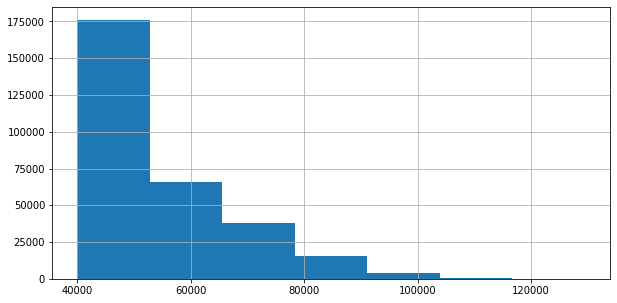

In [3]:
# Salary histogram
salary = salary_df["salary"]

histogram = salary.hist(bins=7,grid=True,figsize=(10,5))

In [4]:
# Only pull in what columns are needed for bar chart
employee_salary_df = employee_salary_df[["title","salary"]]

# Find the average salary per title
employee_salary_avg = employee_salary_df.groupby("title").mean()

# Reset the index 
employee_salary_avg_df = employee_salary_avg.reset_index()
employee_salary_avg_df.head()

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704


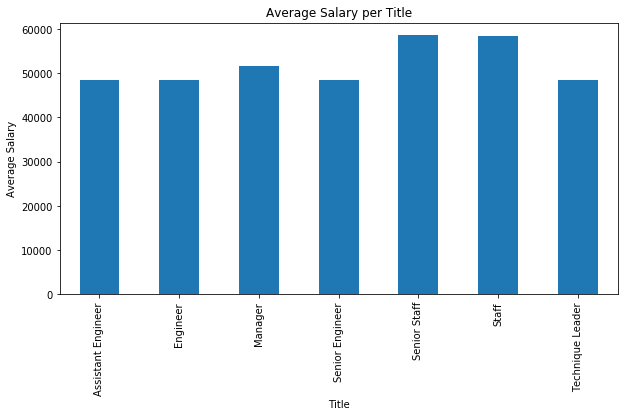

In [5]:
# Create a bar chart of average salary per title
fig1 = employee_salary_avg_df.plot(kind='bar', x='title',y='salary', title="Average Salary per Title", figsize=(10,5),
                                  legend=None)

fig1.set_ylabel("Average Salary")
fig1.set_xlabel("Title")
plt.show()